<a href="https://colab.research.google.com/github/rhmdftrianto/DATMIN/blob/main/Twitter_Sentiment_Analysis_Rahmad_Fitrianto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Sentiment Analysis

## Library

In [5]:
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-zb04ayiv
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-zb04ayiv
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit c3b216c3cb8593513a018eb3ec4fd6f18d3aba5b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [6]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import pandas as pd
import snscrape.modules. twitter as sntwitter
import re
from textblob import TextBlob
from translate import Translator
import numpy as np
import matplotlib.pyplot as plt

## Scrapping TWT Data

In [9]:
hasilSearch = sntwitter.TwitterSearchScraper("#Virgoun")

##### StopWords

In [10]:
translator = Translator(to_lang="en", from_lang="id")
tweet_properties_list = []

for i, tweet in enumerate(hasilSearch.get_items()):
    tweet_properties = {}
    tweet_properties['tanggal_tweet'] = tweet.date
    tweet_properties['pengguna'] = tweet.user.username
    tweet_properties['isi_tweet'] = tweet.content
    tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.content).split())
    
    # translated_text = translator.translate(tweet_bersih)
    
    analysis = TextBlob(tweet_bersih)

    tweet_properties['sentiment'] = 'positive' if analysis.sentiment.polarity > 0.0 else 'negative'


    if tweet.retweetCount > 0:
      if tweet_properties not in tweet_properties_list:
        tweet_properties_list.append(tweet_properties)
    else:
      tweet_properties_list.append(tweet_properties)

    if i == 199:
        break


<ipython-input-10-a266a6ea7baa>:8: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet_properties['isi_tweet'] = tweet.content
<ipython-input-10-a266a6ea7baa>:9: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.content).split())


##### Columning

In [11]:
tweet_data = [] 

for i, tweet in enumerate(hasilSearch.get_items()):
    tweet_list=[tweet.date, tweet.user.username, tweet.content]
    tweet_data.append(tweet_list)
    if i == 200 :
        break

<ipython-input-11-96b1acded64c>:4: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet_list=[tweet.date, tweet.user.username, tweet.content]


In [12]:
tweet_data

[[datetime.datetime(2023, 6, 9, 11, 45, 10, tzinfo=datetime.timezone.utc),
  'ayojakartanews',
  'Mediasi Berlangsung Alot, Virgoun Buka Suara https://t.co/x0iuOZWzXg #Virgoun'],
 [datetime.datetime(2023, 6, 9, 11, 36, 23, tzinfo=datetime.timezone.utc),
  'ayojakartanews',
  'Kakak Virgoun Sindir Inara Rusli https://t.co/Etkq63ZWZj #Virgoun #InaraRusli'],
 [datetime.datetime(2023, 6, 9, 9, 12, 23, tzinfo=datetime.timezone.utc),
  'MNCupdate',
  'Hasil sidang mediasi antara Inara Rusli dan Virgoun berujung kegagalan. Gimana nih tanggapan Updaters?\xa0\n\n#InaraRusli #Virgoun #cerai #artisindonesia #musisi #beritaviral #viral #HotGossip #MNCUpdate #Updaters https://t.co/YefEW6Rg7A'],
 [datetime.datetime(2023, 6, 8, 14, 45, 22, tzinfo=datetime.timezone.utc),
  'traderkawakan',
  'kaget banget akun second gue tiba-tiba verified 😭🙏, dibantuin sama akun instagram : jastip.coldplay \n\n#instagram #indonesia #virgoun #alditaher #indonesia #verified #centangbiru https://t.co/yuh6NsAHS8'],
 [dat

In [13]:
tweet_df= pd.DataFrame(tweet_data, columns=['date', 'user','tweet'])


In [14]:
tweet_df

,date,user,tweet
0,2023-06-09 11:45:10+00:00,ayojakartanews,"Mediasi Berlangsung Alot, Virgoun Buka Suara h..."
1,2023-06-09 11:36:23+00:00,ayojakartanews,Kakak Virgoun Sindir Inara Rusli https://t.co/...
2,2023-06-09 09:12:23+00:00,MNCupdate,Hasil sidang mediasi antara Inara Rusli dan Vi...
3,2023-06-08 14:45:22+00:00,traderkawakan,kaget banget akun second gue tiba-tiba verifie...
4,2023-06-08 07:54:46+00:00,JalanViral,Sidang mediasi Inara Idola Usli dan Virgoun ta...
...,...,...,...
196,2023-05-24 11:09:38+00:00,chatnews_id,#Inara Rusli mengakui telah melayangkan gugata...
197,2023-05-24 10:48:19+00:00,fajaronline,"Kabar Dijodohkan dengan Pria Arab, Inara Rusli..."
198,2023-05-24 10:07:33+00:00,wow_keren,Widy Vierratale Bagikan Senyum Semringah Virgo...
199,2023-05-24 07:18:38+00:00,fajaronline,"Tak Bisa Rujuk Lagi Secara Agama, Inara Rusli ..."


##### Labelling

In [15]:
tweet_positif = [t for t in tweet_properties_list if t['sentiment'] == 'positive']
tweet_negatif = [t for t in tweet_properties_list if t['sentiment'] == 'negative']

In [16]:
print(f"""Hasil Sentimen
Positif : {len(tweet_positif)}
Negatif : {len(tweet_negatif)}
""")

Hasil Sentimen
Positif : 38
Negatif : 162



In [17]:
print(tweet_properties_list)

[{'tanggal_tweet': datetime.datetime(2023, 6, 9, 11, 45, 10, tzinfo=datetime.timezone.utc), 'pengguna': 'ayojakartanews', 'isi_tweet': 'Mediasi Berlangsung Alot, Virgoun Buka Suara https://t.co/x0iuOZWzXg #Virgoun', 'sentiment': 'negative'}, {'tanggal_tweet': datetime.datetime(2023, 6, 9, 11, 36, 23, tzinfo=datetime.timezone.utc), 'pengguna': 'ayojakartanews', 'isi_tweet': 'Kakak Virgoun Sindir Inara Rusli https://t.co/Etkq63ZWZj #Virgoun #InaraRusli', 'sentiment': 'negative'}, {'tanggal_tweet': datetime.datetime(2023, 6, 9, 9, 12, 23, tzinfo=datetime.timezone.utc), 'pengguna': 'MNCupdate', 'isi_tweet': 'Hasil sidang mediasi antara Inara Rusli dan Virgoun berujung kegagalan. Gimana nih tanggapan Updaters?\xa0\n\n#InaraRusli #Virgoun #cerai #artisindonesia #musisi #beritaviral #viral #HotGossip #MNCUpdate #Updaters https://t.co/YefEW6Rg7A', 'sentiment': 'negative'}, {'tanggal_tweet': datetime.datetime(2023, 6, 8, 14, 45, 22, tzinfo=datetime.timezone.utc), 'pengguna': 'traderkawakan', 'i

In [18]:
tweet_df = pd.DataFrame.from_records(tweet_properties_list, columns=['tanggal_tweet', 'pengguna', 'isi_tweet', 'sentiment'])

In [19]:
tweet_df

,tanggal_tweet,pengguna,isi_tweet,sentiment
0,2023-06-09 11:45:10+00:00,ayojakartanews,"Mediasi Berlangsung Alot, Virgoun Buka Suara h...",negative
1,2023-06-09 11:36:23+00:00,ayojakartanews,Kakak Virgoun Sindir Inara Rusli https://t.co/...,negative
2,2023-06-09 09:12:23+00:00,MNCupdate,Hasil sidang mediasi antara Inara Rusli dan Vi...,negative
3,2023-06-08 14:45:22+00:00,traderkawakan,kaget banget akun second gue tiba-tiba verifie...,negative
4,2023-06-08 07:54:46+00:00,JalanViral,Sidang mediasi Inara Idola Usli dan Virgoun ta...,negative
...,...,...,...,...
195,2023-05-24 11:11:25+00:00,sor_alpha,Masih ngakak meskipun d ulangulang 📷\n\nhttps:...,negative
196,2023-05-24 11:09:38+00:00,chatnews_id,#Inara Rusli mengakui telah melayangkan gugata...,negative
197,2023-05-24 10:48:19+00:00,fajaronline,"Kabar Dijodohkan dengan Pria Arab, Inara Rusli...",negative
198,2023-05-24 10:07:33+00:00,wow_keren,Widy Vierratale Bagikan Senyum Semringah Virgo...,positive


In [20]:
df = tweet_df

### Cleaning

In [21]:
import nltk

import requests
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# CONSTRUCT STOPWORDS
rama_stopword = "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/stopword.txt"
yutomo_stopword = "https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt"
fpmipa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/fpmipa-stopwords.txt"
sastrawi_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt"
aliakbar_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/aliakbars-bilp.txt"
pebahasa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/pebbie-pebahasa.txt"
elang_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-id.txt"
nltk_stopword = stopwords.words('indonesian')

# create path url for each stopword
path_stopwords = [rama_stopword, yutomo_stopword, fpmipa_stopword, sastrawi_stopword, 
                  aliakbar_stopword, pebahasa_stopword, elang_stopword]

# combine stopwords
stopwords_l = nltk_stopword
for path in path_stopwords:
    response = requests.get(path)
    stopwords_l += response.text.split('\n')

custom_st = '''
yg yang dgn ane smpai bgt gua gwa si tu ama utk udh btw
ntar lol ttg emg aj aja tll sy sih kalo nya trsa mnrt nih
ma dr ajaa tp akan bs bikin kta pas pdahl bnyak guys abis tnx
bang banget nang mas amat bangettt tjoy hemm haha sllu hrs lanjut
bgtu sbnrnya trjadi bgtu pdhl gt https sm plg skrg 
'''

# create dictionary with unique stopword
st_words = set(stopwords_l)
custom_stopword = set(custom_st.split())

# result stopwords
stop_words = st_words | custom_stopword
print(f'Stopwords: {list(stop_words)[:5]}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Stopwords: ['mencari', 'pastilah', 'diduga', 'selaku', 'do']


#### Text Cleaning

In [22]:
import re

# cleaning text
def cleaning_text(text):
    # remove url
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text =  url_pattern.sub(r'', text)

    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)

    # remove mention handle user (@)
    text = re.sub(r'@[\w]*', ' ', text)

    # remove punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, " ") 
    
    # remove extra whitespace
    text = text.strip()

    # lowercase
    text = text.lower()
    return text

##### Positive Words

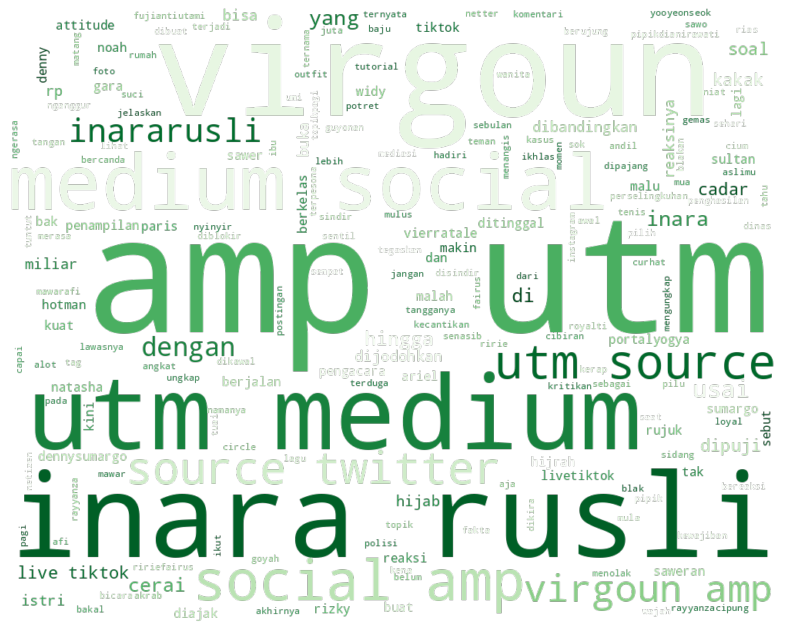

In [23]:
from wordcloud import WordCloud

# wordcloud tweet sentiment positive
data_pos = df[df['sentiment'] == 'positive']

cleaned_text_pos = data_pos['isi_tweet'].apply(cleaning_text)
cleaned_text_pos = cleaned_text_pos.str.replace('http\S+|https\S+', '', regex=True)

all_text_pos = ' '.join(word for word in cleaned_text_pos)
wordcloud_pos = WordCloud(colormap='Greens', width=1000, height=800, mode='RGBA', background_color=None).generate(all_text_pos)

plt.figure(figsize=(20, 10), dpi=80)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

##### Negative Words

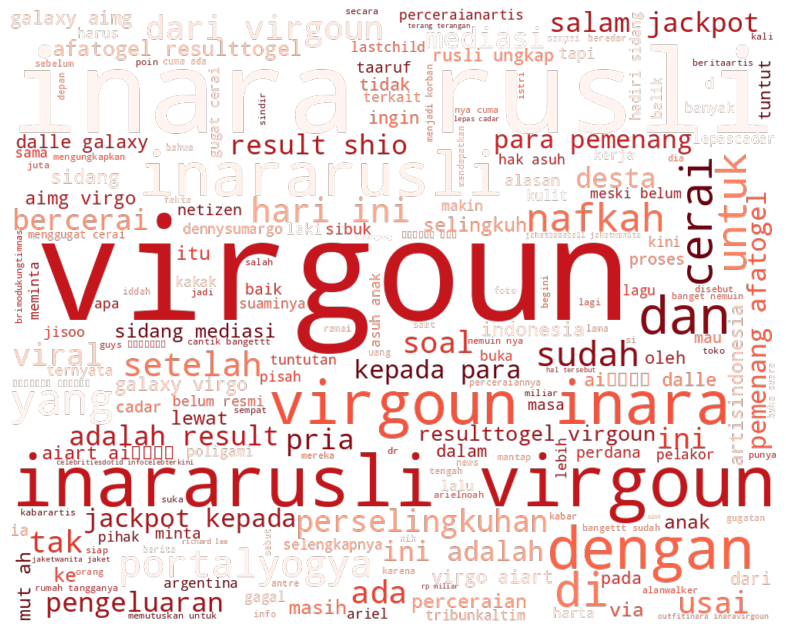

In [24]:
# wordcloud tweet sentiment negative
data_neg = df[df['sentiment'] == 'negative']

cleaned_text_neg = data_neg['isi_tweet'].apply(cleaning_text)
cleaned_text_neg = cleaned_text_neg.str.replace('http\S+|https\S+', '', regex=True)

all_text_neg = ' '.join(word for word in cleaned_text_neg)
wordcloud_neg = WordCloud(colormap='Reds', width=1000, height=800, mode='RGBA', background_color=None).generate(all_text_neg)

plt.figure(figsize=(20, 10), dpi=80)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [25]:
# remove stopwords
from nltk import word_tokenize, sent_tokenize

def remove_stopword(text, stop_words=stop_words):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [26]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


In [27]:
# stemming and lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming_and_lemmatization(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

In [28]:
# tokenization
def tokenize(text):
    return word_tokenize(text)

In [29]:
# example
text = 'Sidang mediasi Inara Idola Usli dan Virgoun tak membuahkan titik temu, alias gagal. Kedua pihak, Inara Rusli dan Virgoun, tetap pada keputusannya untuk berpisah. #jalanviral #viralvideo #virgoun #rumpi #gosip https://t.co/T59OVdaIMz'
print(f'Original text: \n{text}\n')

# cleaning text and lowercase
text = cleaning_text(text)
print(f'Cleaned text: \n{text}\n')

# remove stopwords
text = remove_stopword(text)
print(f'Removed stopword: \n{text}\n')

# stemming and lemmatization
text = stemming_and_lemmatization(text)
print(f'Stemmed and lemmatized: \n{text}\n')

# tokenization
text = tokenize(text)
print(f'Tokenized: \n{text}')

Original text: 
Sidang mediasi Inara Idola Usli dan Virgoun tak membuahkan titik temu, alias gagal. Kedua pihak, Inara Rusli dan Virgoun, tetap pada keputusannya untuk berpisah. #jalanviral #viralvideo #virgoun #rumpi #gosip https://t.co/T59OVdaIMz

Cleaned text: 
sidang mediasi inara idola usli dan virgoun tak membuahkan titik temu  alias gagal  kedua pihak  inara rusli dan virgoun  tetap pada keputusannya untuk berpisah  jalanviral viralvideo virgoun rumpi gosip

Removed stopword: 
sidang mediasi inara idola usli virgoun membuahkan titik temu alias gagal inara rusli virgoun keputusannya berpisah jalanviral viralvideo virgoun rumpi gosip

Stemmed and lemmatized: 
sidang mediasi inara idola usli virgoun buah titik temu alias gagal inara rusli virgoun putus pisah jalanviral viralvideo virgoun rumpi gosip

Tokenized: 
['sidang', 'mediasi', 'inara', 'idola', 'usli', 'virgoun', 'buah', 'titik', 'temu', 'alias', 'gagal', 'inara', 'rusli', 'virgoun', 'putus', 'pisah', 'jalanviral', 'viralvid

In [30]:
# pipeline preprocess
def preprocess(text):
    # cleaning text and lowercase
    output = cleaning_text(text)

    # remove stopwords
    output = remove_stopword(output)

    # stemming and lemmatization
    output = stemming_and_lemmatization(output)

    # tokenization
    output = tokenize(output)

    return output

In [31]:
# test pipeline preprocess
text = 'Sidang mediasi Inara Idola Usli dan Virgoun tak membuahkan titik temu, alias gagal. Kedua pihak, Inara Rusli dan Virgoun, tetap pada keputusannya untuk berpisah. #jalanviral #viralvideo #virgoun #rumpi #gosip https://t.co/T59OVdaIMz'
preprocess(text)

['sidang',
 'mediasi',
 'inara',
 'idola',
 'usli',
 'virgoun',
 'buah',
 'titik',
 'temu',
 'alias',
 'gagal',
 'inara',
 'rusli',
 'virgoun',
 'putus',
 'pisah',
 'jalanviral',
 'viralvideo',
 'virgoun',
 'rumpi',
 'gosip']

In [32]:
# implement preprocessing
preprocessed_data = df.copy()
preprocessed_data['Text Tweet'] = df['isi_tweet'].map(preprocess)

In [33]:
preprocessed_data.head()

,tanggal_tweet,pengguna,isi_tweet,sentiment,Text Tweet
0,2023-06-09 11:45:10+00:00,ayojakartanews,"Mediasi Berlangsung Alot, Virgoun Buka Suara h...",negative,"[mediasi, alot, virgoun, buka, suara, virgoun]"
1,2023-06-09 11:36:23+00:00,ayojakartanews,Kakak Virgoun Sindir Inara Rusli https://t.co/...,negative,"[kakak, virgoun, sindir, inara, rusli, virgoun..."
2,2023-06-09 09:12:23+00:00,MNCupdate,Hasil sidang mediasi antara Inara Rusli dan Vi...,negative,"[sidang, mediasi, inara, rusli, virgoun, ujung..."
3,2023-06-08 14:45:22+00:00,traderkawakan,kaget banget akun second gue tiba-tiba verifie...,negative,"[kaget, akun, second, verified, dibantuin, aku..."
4,2023-06-08 07:54:46+00:00,JalanViral,Sidang mediasi Inara Idola Usli dan Virgoun ta...,negative,"[sidang, mediasi, inara, idola, usli, virgoun,..."


In [34]:
from sklearn.model_selection import train_test_split

X = preprocessed_data['isi_tweet']
y = preprocessed_data['sentiment']

X.head()

0    Mediasi Berlangsung Alot, Virgoun Buka Suara h...
1    Kakak Virgoun Sindir Inara Rusli https://t.co/...
2    Hasil sidang mediasi antara Inara Rusli dan Vi...
3    kaget banget akun second gue tiba-tiba verifie...
4    Sidang mediasi Inara Idola Usli dan Virgoun ta...
Name: isi_tweet, dtype: object

In [35]:
# mapping, negative = 0, positive = 1
y = y.map({'negative':0, 'positive':1})
y.head()

0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [36]:
train_x, test_x, train_y, test_y = train_test_split(X, y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=2021)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((180,), (180,), (20,), (20,))

In [37]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in tweet:
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [38]:
# create vocabulary / dictionary frequencies
freqs = build_freqs(train_x.tolist(), train_y.tolist())

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 198


In [39]:
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    # loop through each word in the list of words
    for word in tweet:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.),0)
        
    assert(x.shape == (1, 3))
    return x

In [40]:
# test extract features function
tmp = extract_features(train_x.to_numpy()[0], freqs)

print(f'text: {train_x.to_numpy()[0]}')
print(f'feature extraction result: {tmp}')

text: every human being has a different life journey in every test there must be wisdom that we can learn and the way humans capture wisdom in each test must also be different, basically we all have to learn to let go it's impossible to forget but to let it go #virgoun
feature extraction result: [[1.00000e+00 7.63580e+04 3.30838e+05]]


In [41]:
# extract all of the features

# collect the features 'x' and stack them into a matrix 'X'
X_train = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X_train[i, :]= extract_features(train_x.to_numpy()[i], freqs)

X_train[:5]

array([[1.00000e+00, 7.63580e+04, 3.30838e+05],
       [1.00000e+00, 3.06140e+04, 1.33864e+05],
       [1.00000e+00, 4.57260e+04, 2.02424e+05],
       [1.00000e+00, 7.46200e+04, 3.22857e+05],
       [1.00000e+00, 4.14350e+04, 1.80696e+05]])

In [42]:
# collect the features 'x' and stack them into a matrix 'X'
X_test = np.zeros((len(test_x), 3))
for i in range(len(test_x)):
    X_test[i, :]= extract_features(test_x.to_numpy()[i], freqs)

In [43]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [44]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, train_y)


RandomForestClassifier()

In [45]:
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(test_y,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_test, test_y) * 100, 2)


cm = confusion_matrix(test_y, Y_prediction)
accuracy = accuracy_score(test_y,Y_prediction)
precision =precision_score(test_y, Y_prediction,average='micro')
recall =  recall_score(test_y, Y_prediction,average='micro')
f1 = f1_score(test_y,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for Random Forest
 [[15  1]
 [ 2  2]]
accuracy_random_Forest : 0.850
precision_random_Forest : 0.850
recall_random_Forest : 0.850
f1-score_random_Forest : 0.850
